In [1]:
import iris
import matplotlib.pyplot as plt
import numpy as np

from aeolus.lfric import load_lfric_raw
from aeolus.const import init_const
from aeolus.coord import get_cube_rel_days
from aeolus.calc import time_mean, zonal_mean, spatial_mean, last_n_day_mean
from aeolus.io import load_data
from aeolus.lfric import ugrid_spatial, load_lfric_raw, clean_attrs, fix_time_coord
from aeolus.model import lfric
from aeolus.subset import DimConstr

import paths

In [2]:
# c_num = "C48"
DC = DimConstr(model=lfric)
sim_label = "thai_hab1_conv_off_c192s0p125"
planet = "thai_hab1"
# const = init_const(planet, directory=paths.const)

In [3]:
dset_raw = load_lfric_raw(
    paths.data_raw
    / sim_label
    / "*"
    / f"run*"
    / "lfric_diag.nc",
    drop_coord=["forecast_reference_time"],
)

In [7]:
dset_init = load_lfric_raw(
    paths.data_raw
    / sim_label
    / "1"
    / f"run*"
    / "lfric_initial.nc",
    drop_coord=["forecast_reference_time"],
)
grid_cell_area = dset_init.extract_cube("grid_cell_area")

In [6]:
[i.var_name for i in dset_raw.extract(DC.relax.t)]

['cloud_amount_maxrnd',
 'combined_cloud_amount',
 'grid_surface_temperature',
 'low_type_cloud_amount',
 'very_high_type_cloud_amount',
 'very_low_type_cloud_amount',
 'high_type_cloud_amount',
 'medium_type_cloud_amount',
 'lw_up_toa']

In [13]:
t_sfc = dset_raw.extract_cube("grid_surface_temperature")

In [35]:
 # need to calculate weights!

/home/ds591/mambaforge/envs/lfric_ana/lib/python3.11/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'mesh_coordinates', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'mesh_coordinates'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))


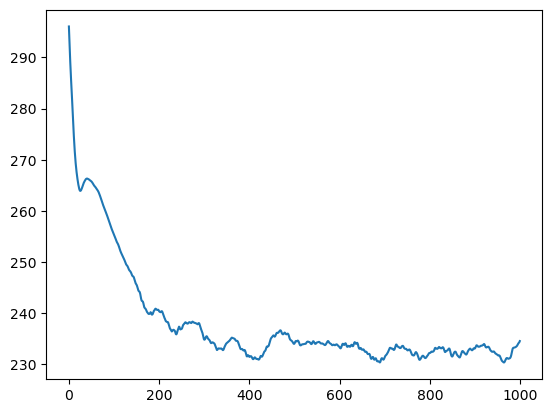

In [36]:
cube = ugrid_spatial(t_sfc, "mean", weights=grid_cell_area.lazy_data())

plt.plot(get_cube_rel_days(cube), cube.data)

In [10]:
sw_direct_toa = ugrid_spatial(dset_raw.extract_cube("sw_direct_toa"), "mean")
sw_up_toa = ugrid_spatial(dset_raw.extract_cube("sw_up_toa"), "mean")
lw_up_toa = ugrid_spatial(dset_raw.extract_cube("lw_up_toa"), "mean")
toa_net = sw_direct_toa - sw_up_toa - lw_up_toa

ConstraintMismatchError: Got 0 cubes for constraint Constraint(name='sw_up_toa'), expecting 1.